In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
warnings.simplefilter("ignore", UserWarning)

In [2]:
otc_final=pd.read_csv("./data/otc_final.csv")
otc_final.head(10)

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.95,10,19.50,2010-12-01 09:37:00,u14688,United Kingdom
1,536384,22469,HEART OF WICKER SMALL,1.45,40,58.00,2010-12-01 09:53:00,u18074,United Kingdom
2,536389,22193,RED DINER WALL CLOCK,8.50,2,17.00,2010-12-01 10:03:00,u12431,Australia
3,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,1.65,-12,-19.80,2010-12-01 10:24:00,u17548,United Kingdom
4,536395,22727,ALARM CLOCK BAKELIKE RED,3.75,8,30.00,2010-12-01 10:47:00,u13767,United Kingdom
5,536401,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,0.85,1,0.85,2010-12-01 11:21:00,u15862,United Kingdom
6,536409,22972,CHILDRENS SPACEBOY MUG,1.65,1,1.65,2010-12-01 11:45:00,u17908,United Kingdom
7,536412,22273,FELTCRAFT DOLL MOLLY,2.95,1,2.95,2010-12-01 11:49:00,u1792,United Kingdom
8,536415,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,2.95,5,14.75,2010-12-01 11:57:00,u12838,United Kingdom
9,536415,22554,PLASTERS IN TIN WOODLAND ANIMALS,1.65,3,4.95,2010-12-01 11:57:00,u12838,United Kingdom


In [4]:
otc_final.shape

(395628, 9)

In [6]:
otc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395628 entries, 0 to 395627
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   invoice            395628 non-null  object 
 1   stock_code         395628 non-null  object 
 2   description        395628 non-null  object 
 3   price              395628 non-null  float64
 4   quantity           395628 non-null  int64  
 5   total_order_value  395628 non-null  float64
 6   invoice_date       395628 non-null  object 
 7   customer_id        395628 non-null  object 
 8   country            395628 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 27.2+ MB


## Defining the particular period of time for the purpose of analysis

In [7]:
# changing the datatype of 'invoice_date' to_datetime
otc_final.invoice_date=pd.to_datetime(otc_final.invoice_date)
otc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395628 entries, 0 to 395627
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            395628 non-null  object        
 1   stock_code         395628 non-null  object        
 2   description        395628 non-null  object        
 3   price              395628 non-null  float64       
 4   quantity           395628 non-null  int64         
 5   total_order_value  395628 non-null  float64       
 6   invoice_date       395628 non-null  datetime64[ns]
 7   customer_id        395628 non-null  object        
 8   country            395628 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.2+ MB


**The first and the last transactions in the initial dataframe**

In [8]:

print(f'The first and the last transactions: \n{otc_final.invoice_date.min()}, \n{otc_final.invoice_date.max()}')
      

The first and the last transactions: 
2010-12-01 08:26:00, 
2011-12-09 12:50:00


**The particular dataframe provides data transactions for only 12 months and 8 days.
The data analysis will be focused on the transactions available for the 12 months exactly with the strating datetime 2010-12-09
and the last datetime 2011-12-09. In this case the hypothetical "recent" timestamp will be set to 2011-12-10**

In [9]:
start_date = otc_final.invoice_date.min()+datetime.timedelta(days=8)
rec_date = start_date + datetime.timedelta(days=366)

print(f'The first timestamp and the recent timestamp for the purpose of the RFM analysis: \n{start_date}, \n{rec_date}')

The first timestamp and the recent timestamp for the purpose of the RFM analysis: 
2010-12-09 08:26:00, 
2011-12-10 08:26:00


**Keeping only the transactions, which belong to the particular period of time [2010-12-09,2011-12-10)**

In [10]:
otc_final_year=otc_final[otc_final.invoice_date.between(start_date,rec_date)]
otc_final_year

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
2359,537887,21481,FAWN BLUE HOT WATER BOTTLE,2.55,36,91.80,2010-12-09 10:00:00,u18092,United Kingdom
2360,537888,22746,POPPY'S PLAYHOUSE LIVINGROOM,2.10,6,12.60,2010-12-09 10:04:00,u15358,United Kingdom
2361,537896,22855,FINE WICKER HEART,1.25,24,30.00,2010-12-09 10:33:00,u18071,United Kingdom
2362,537900,22516,CHILDS GARDEN RAKE BLUE,2.10,1,2.10,2010-12-09 10:45:00,u15983,United Kingdom
2363,537955,79066K,RETRO MOD TRAY,0.85,2,1.70,2010-12-09 11:28:00,u16782,United Kingdom
...,...,...,...,...,...,...,...,...,...
395623,581495,15056N,EDWARDIAN PARASOL NATURAL,5.95,36,214.20,2011-12-09 10:20:00,u14051,United Kingdom
395624,581502,23103,JINGLE BELL HEART DECORATION,1.65,8,13.20,2011-12-09 10:51:00,u1591,United Kingdom
395625,581538,21328,BALLOONS WRITING SET,1.65,1,1.65,2011-12-09 11:34:00,u14446,United Kingdom
395626,581574,21258,VICTORIAN SEWING BOX LARGE,12.75,2,25.50,2011-12-09 12:09:00,u12526,Germany


# Analyzing and visualyzing data for the purpose of customer segmentation

## Top ten most popular geographical locations

In [11]:
pop10Country=otc_final_year.groupby(["country"]).agg({"invoice":"nunique"}).sort_values(by="invoice",ascending=False).reset_index().head(10)
pop10Country

,country,invoice
0,United Kingdom,18321
1,Germany,546
2,France,415
3,EIRE,299
4,Belgium,112
5,Spain,96
6,Netherlands,93
7,Switzerland,62
8,Australia,58
9,Portugal,49


## Country, which spends the most considering the order value i.e. price*quantity


In [12]:
maxSpend=otc_final_year.groupby("country").agg({"total_order_value":"sum"}).sort_values(by="total_order_value",ascending=False).reset_index()
maxSpend

,country,total_order_value
0,United Kingdom,6559188.31
1,Netherlands,283301.94
2,EIRE,243312.14
3,Germany,196648.57
4,France,177368.85
5,Australia,136305.35
6,Switzerland,51636.00
7,Spain,51126.65
8,Belgium,36352.86
9,Sweden,35166.41


In [13]:
maxSpend10=maxSpend.head(10)
maxSpend10

,country,total_order_value
0,United Kingdom,6559188.31
1,Netherlands,283301.94
2,EIRE,243312.14
3,Germany,196648.57
4,France,177368.85
5,Australia,136305.35
6,Switzerland,51636.00
7,Spain,51126.65
8,Belgium,36352.86
9,Sweden,35166.41


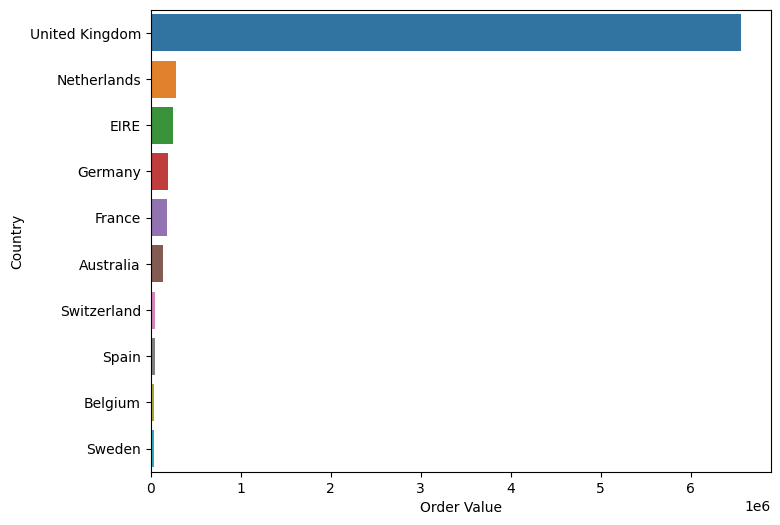

In [16]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot()
sns.barplot(data=maxSpend10,x=maxSpend10.total_order_value,y=maxSpend10.country)
ax.set_ylabel('Country')
ax.set_xlabel('Order Value')
plt.show()


**Total order value across the countries for the defined period of time**

In [17]:
sumAllCountries=maxSpend10.total_order_value.sum()
sumAllCountries

7770407.08

**Contribution of each country to total order value**

In [18]:
maxSpend10["%"]=(maxSpend10.total_order_value/sumAllCountries)*100
maxSpend10

C:\Users\npana\AppData\Local\Temp\ipykernel_9888\1183956068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maxSpend10["%"]=(maxSpend10.total_order_value/sumAllCountries)*100


,country,total_order_value,%
0,United Kingdom,6559188.31,84.412415
1,Netherlands,283301.94,3.645909
2,EIRE,243312.14,3.131266
3,Germany,196648.57,2.530737
4,France,177368.85,2.282620
5,Australia,136305.35,1.754160
6,Switzerland,51636.00,0.664521
7,Spain,51126.65,0.657966
8,Belgium,36352.86,0.467837
9,Sweden,35166.41,0.452568


In [19]:
data={"country": ["United Kingdom","Other countries"],"total_order_value":[0,0]}
summarySpend10=pd.DataFrame.from_dict(data)
summarySpend10.iloc[0,1]=round(maxSpend10.iloc[0,2],2)
summarySpend10.iloc[1,1]=round(100-maxSpend10.iloc[0,2],2)

In [20]:
summarySpend10

,country,total_order_value
0,United Kingdom,84.41
1,Other countries,15.59


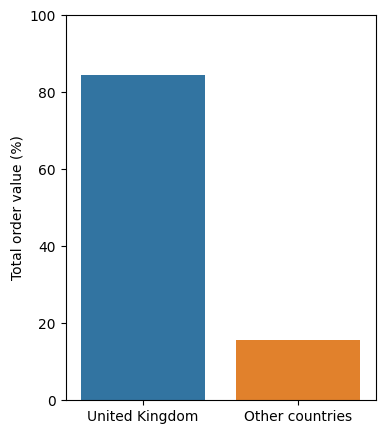

In [21]:
fig=plt.figure(figsize=(4,5))
ax=fig.add_subplot()
sns.barplot(data=summarySpend10,x=summarySpend10.country,y=summarySpend10.total_order_value)
ax.set_ylim(0,100)
ax.set_xlabel("")
ax.set_ylabel("Total order value (%)")
plt.show()

## Visualizing distribution of invoices per month

In [22]:
monthDate=otc_final_year.invoice_date.dt.month
monthDate

2359      12
2360      12
2361      12
2362      12
2363      12
          ..
395623    12
395624    12
395625    12
395626    12
395627    12
Name: invoice_date, Length: 383092, dtype: int32

In [23]:
otc_final_year.insert(7,"invoice_month",monthDate)
#del otc_final_year["monthOfinvoice"]

In [24]:
invoicePerMonth=otc_final_year.groupby("invoice_month")["invoice"].nunique().sort_values(ascending=False)\
.to_frame("num_invoices")
invoicePerMonth.sort_values(by="num_invoices")

,num_invoices
invoice_month,
2,1153
1,1182
4,1311
8,1467
7,1505
3,1544
6,1628
5,1766
12,1790


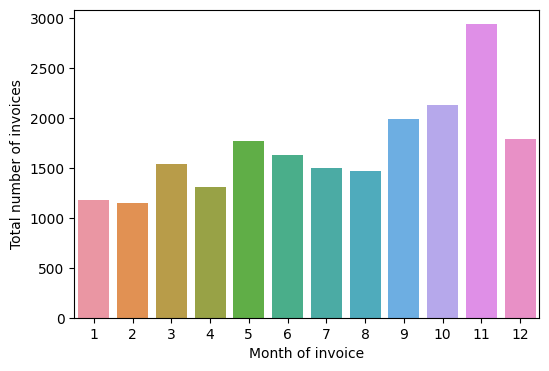

In [25]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot()
sns.barplot(data=invoicePerMonth,x=invoicePerMonth.index,y=invoicePerMonth.num_invoices)
ax.set_xlabel("Month of invoice")
ax.set_ylabel("Total number of invoices")
plt.show()

## Month with the highest number of transactions

In [26]:
monthHighTrans=invoicePerMonth.sort_values(by="num_invoices",ascending=False).head(1)
monthHighTrans

,num_invoices
invoice_month,
11,2939


## The day of the week with the highest number of transactions

In [27]:
dayOfInvoice=otc_final_year.invoice_date.dt.day_name()
dayOfInvoice

2359      Thursday
2360      Thursday
2361      Thursday
2362      Thursday
2363      Thursday
            ...   
395623      Friday
395624      Friday
395625      Friday
395626      Friday
395627      Friday
Name: invoice_date, Length: 383092, dtype: object

In [30]:
otc_final_year.insert(8,'invoice_day',dayOfInvoice)
otc_final_year.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,invoice_month,invoice_day,customer_id,country
2359,537887,21481,FAWN BLUE HOT WATER BOTTLE,2.55,36,91.8,2010-12-09 10:00:00,12,Thursday,u18092,United Kingdom
2360,537888,22746,POPPY'S PLAYHOUSE LIVINGROOM,2.10,6,12.6,2010-12-09 10:04:00,12,Thursday,u15358,United Kingdom
2361,537896,22855,FINE WICKER HEART,1.25,24,30.0,2010-12-09 10:33:00,12,Thursday,u18071,United Kingdom
2362,537900,22516,CHILDS GARDEN RAKE BLUE,2.10,1,2.1,2010-12-09 10:45:00,12,Thursday,u15983,United Kingdom
2363,537955,79066K,RETRO MOD TRAY,0.85,2,1.7,2010-12-09 11:28:00,12,Thursday,u16782,United Kingdom


In [31]:
highDemandDay=otc_final_year.groupby("invoice_day")["invoice"].nunique().to_frame("num_invoices")
highDemandDay=highDemandDay.sort_values(by='num_invoices',ascending=False).head(1)
highDemandDay

,num_invoices
invoice_day,
Thursday,4577


# Evaluating the profile of customers:
- Evaluation based on the order value field (Monetary Value). 
- Identifying customers that have spent more than the average user.
- Customers, which have purchased the most (looking at the Frequency of orders).
- How recent the customers have purchased (Recency)


## Evaluation of the order value field (Monetary Value).

In [64]:
monValue=otc_final_year.groupby('customer_id').\
agg({'total_order_value':'sum'})
monValue.rename(columns={'total_order_value':'Monetary_Value'},inplace=True)
monValue

,Monetary_Value
customer_id,
u12347,3598.21
u12348,1437.24
u12349,1457.55
u1235,294.40
u12352,1265.41
...,...
u1828,180.60
u18281,80.82
u18282,176.60


In [72]:
reviewMonValue=monValue.describe()
reviewMonValue

,Monetary_Value
count,4284.000000
mean,1867.528898
std,8063.293047
min,-811.860000
25%,292.642500
50%,640.795000
75%,1564.637500
max,278778.020000


**The following plot presents normal distribution of the variable "monetary value". However, many extreme large monetary values with the low probability can be observed. In this case, they are a normal part of the data distribution considering, that small dataset of observations is available for the analysis.**

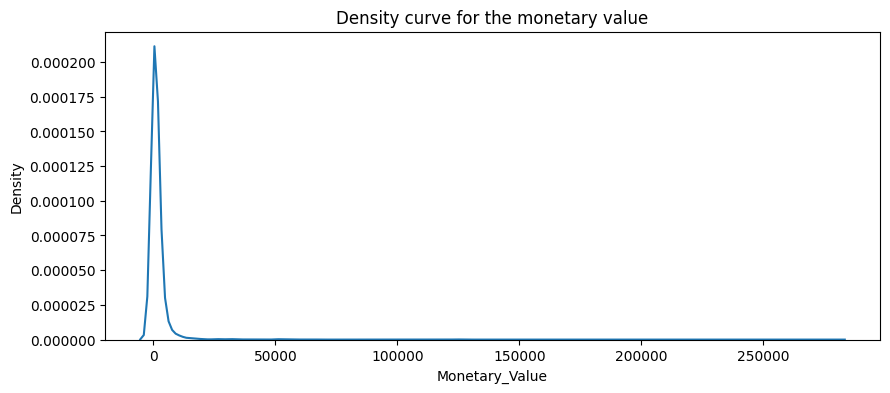

In [34]:
fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot()

sns.kdeplot(data = monValue, x = monValue.Monetary_Value)
plt.title("Density curve for the monetary value")
plt.show()

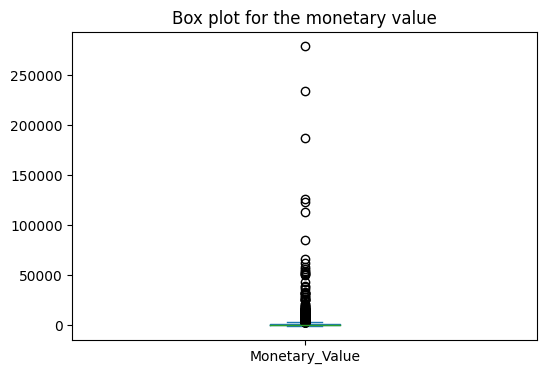

In [66]:
monValue.plot(kind='box',figsize=(6,4))
plt.title("Box plot for the monetary value")
plt.show()

### Finding outliers

The upper bound outliers of the particular dataset correspond to the high profile customers regarding their Monetary Value. For this reason, the outliers are valuable and will not be removed. However, finding the outliers and analyzing further the rest of data provides more comprehensive description and thus, better understanding of data.


In [67]:
q1 = monValue['Monetary_Value'].quantile(0.25)
q3 = monValue['Monetary_Value'].quantile(0.75)
print(f'q1={q1} and q2={q3}')
IQR = q3 - q1
IQR

q1=292.6425 and q2=1564.6375


1271.9950000000001

In [68]:
noOutlMV=monValue[(monValue.Monetary_Value>(q1 - 1.5 * IQR)) & (monValue.Monetary_Value<(q3 + 1.5 * IQR))]
noOutlMV.sort_values(by="Monetary_Value",ascending=False)

,Monetary_Value
customer_id,
u1723,3466.67
u1541,3450.84
u16019,3450.24
u15129,3447.40
u1792,3444.54
...,...
u15728,-134.80
u17307,-152.64
u12666,-227.44


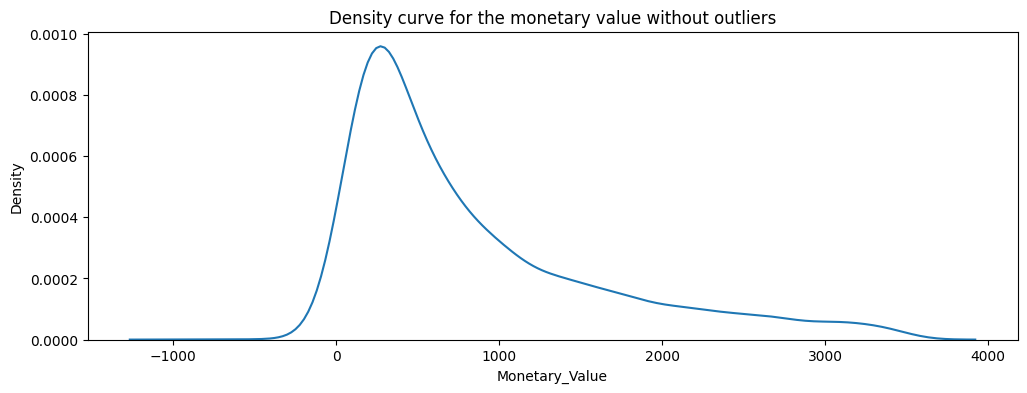

In [69]:
fig=plt.figure(figsize=(12,4))
g1=sns.kdeplot(data = noOutlMV, x = "Monetary_Value")
plt.title("Density curve for the monetary value without outliers")
plt.show()


<Figure size 600x400 with 0 Axes>

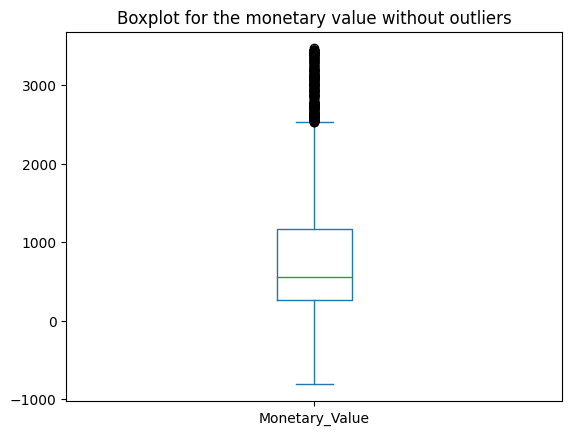

In [74]:
fig=plt.figure(figsize=(6,4))
noOutlMV.plot(kind="box")
plt.title("Boxplot for the monetary value without outliers")
plt.show()

In [73]:
noOutlMVreview=noOutlMV.describe()
reviewMonValue.insert(1,"Monetary_Value_NoOutliers",noOutlMVreview.Monetary_Value)
reviewMonValue

,Monetary_Value,Monetary_Value_NoOutliers
count,4284.000000,3874.000000
mean,1867.528898,842.387065
std,8063.293047,791.046268
min,-811.860000,-811.860000
25%,292.642500,265.320000
50%,640.795000,554.615000
75%,1564.637500,1169.257500
max,278778.020000,3466.670000


## Identifying customers that have spent more than the average user.

In [41]:
monValue.sort_values(by="Monetary_Value",ascending=False)

,Monetary_Value
customer_id,
u14646,278778.02
u18102,233736.93
u1745,187546.69
u14911,125662.61
u12415,123638.18
...,...
u15728,-134.80
u17307,-152.64
u12666,-227.44


As it was mentioned previously, many extreme large monetary values with the low probability result in having many outliers.
Moreover, the distribution of Monetary Value is skewed and for this reason the use of median instead of mean in term of average is considered to be more reliable and representative

In [76]:
monValue.describe()

,Monetary_Value
count,4284.000000
mean,1867.528898
std,8063.293047
min,-811.860000
25%,292.642500
50%,640.795000
75%,1564.637500
max,278778.020000


In [63]:
avgSpentByCust=monValue.median().astype("float64")
avgSpentByCust[0]

640.7950000000001

**All the customers with the monetary value greater that the average monetary value**

In [77]:
custAvgSpend=monValue[monValue.Monetary_Value>=avgSpentByCust[0]]
custAvgSpend.sort_values(by="Monetary_Value",ascending=False)

,Monetary_Value
customer_id,
u14646,278778.02
u18102,233736.93
u1745,187546.69
u14911,125662.61
u12415,123638.18
...,...
u15384,642.41
u17545,642.32
u17046,642.02


**Finding the personal data  of these customers**

In [78]:
mergedAvgCustSpend=pd.merge(otc_final_year, custAvgSpend, on = 'customer_id', how = 'inner') 
mergedAvgCustSpend

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,invoice_month,invoice_day,customer_id,country,Monetary_Value
0,537887,21481,FAWN BLUE HOT WATER BOTTLE,2.55,36,91.80,2010-12-09 10:00:00,12,Thursday,u18092,United Kingdom,9065.76
1,537887,22114,HOT WATER BOTTLE TEA AND SYMPATHY,3.45,96,331.20,2010-12-09 10:00:00,12,Thursday,u18092,United Kingdom,9065.76
2,537887,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,48,162.72,2010-12-09 10:00:00,12,Thursday,u18092,United Kingdom,9065.76
3,537887,22699,ROSES REGENCY TEACUP AND SAUCER,2.55,24,61.20,2010-12-09 10:00:00,12,Thursday,u18092,United Kingdom,9065.76
4,537887,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,24,81.36,2010-12-09 10:00:00,12,Thursday,u18092,United Kingdom,9065.76
...,...,...,...,...,...,...,...,...,...,...,...,...
327328,581105,85152,HAND OVER THE CHOCOLATE SIGN,1.92,620,1190.40,2011-12-07 12:14:00,12,Wednesday,u16,United Kingdom,12393.70
327329,581110,23486,ANTIQUE HEART SHELF UNIT,13.35,150,2002.50,2011-12-07 12:17:00,12,Wednesday,u16,United Kingdom,12393.70
327330,581107,23461,SWEETHEART BIRD HOUSE,3.30,620,2046.00,2011-12-07 12:15:00,12,Wednesday,u16,United Kingdom,12393.70
327331,581105,22457,NATURAL SLATE HEART CHALKBOARD,2.55,620,1581.00,2011-12-07 12:14:00,12,Wednesday,u16,United Kingdom,12393.70


In [89]:
mergedAvgCustSpendDf=mergedAvgCustSpend.groupby(["customer_id","country"]).agg({"total_order_value":"sum"})
mergedAvgCustSpendDf.sort_values(by="total_order_value",ascending=False,inplace=True)
mergedAvgCustSpendDf

,,total_order_value
customer_id,country,
u14646,Netherlands,278778.02
u18102,United Kingdom,233736.93
u1745,United Kingdom,187546.69
u14911,EIRE,125662.61
u12415,Australia,123638.18
...,...,...
u12417,Spain,352.30
u12394,Belgium,351.08
u12422,Switzerland,297.36


In [90]:
mergedAvgCustSpendDf.reset_index().groupby(["country"]).\
agg({"customer_id":"nunique"}).sort_values(by="customer_id",ascending=False)


,customer_id
country,
United Kingdom,1893
Germany,56
France,49
Belgium,19
Spain,17
Switzerland,16
Portugal,10
Italy,8
Channel Islands,8


# Evaluating customers on the Recency and Frequency of their orders.

In [91]:
# Calculation of RFM values
RFMmetrics=otc_final_year.groupby('customer_id').\
agg({'invoice_date':lambda x: (rec_date-x.max()).days,'invoice': 'nunique','total_order_value':'sum'})
RFMmetrics.rename(columns={'invoice_date':'Recency','invoice':'Frequency','total_order_value':'MonetaryValue'},inplace=True)
RFMmetrics

,Recency,Frequency,MonetaryValue
customer_id,,,
u12347,2,6,3598.21
u12348,75,4,1437.24
u12349,18,1,1457.55
u1235,310,1,294.40
u12352,36,8,1265.41
...,...,...,...
u1828,277,1,180.60
u18281,180,1,80.82
u18282,7,3,176.60


## Overview of RFM metrics

In [92]:
RFMmetrics.describe()

,Recency,Frequency,MonetaryValue
count,4284.000000,4284.000000,4284.000000
mean,87.769374,4.764006,1867.528898
std,95.830384,8.629132,8063.293047
min,0.000000,1.000000,-811.860000
25%,16.000000,1.000000,292.642500
50%,49.000000,2.000000,640.795000
75%,134.000000,5.000000,1564.637500
max,365.000000,232.000000,278778.020000


### RECENCY

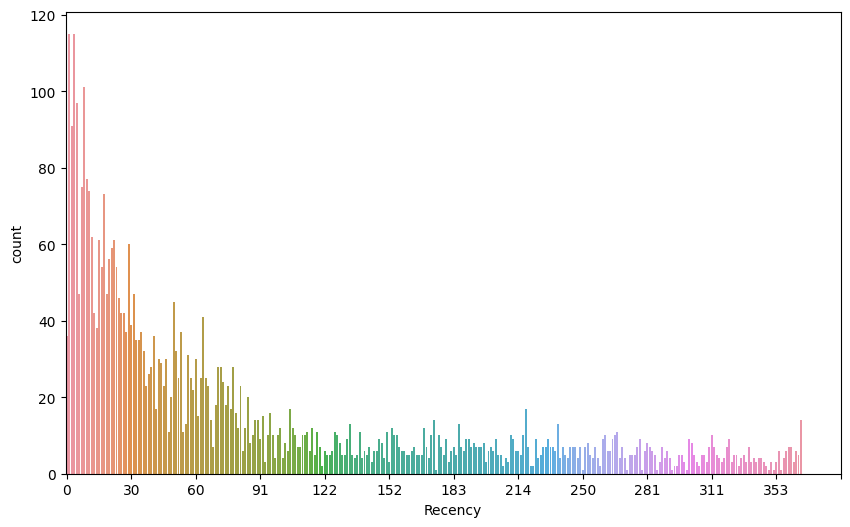

In [93]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

sns.countplot(data=RFMmetrics,x='Recency')
ax.set_xticks(range(0,330,26))
plt.show()

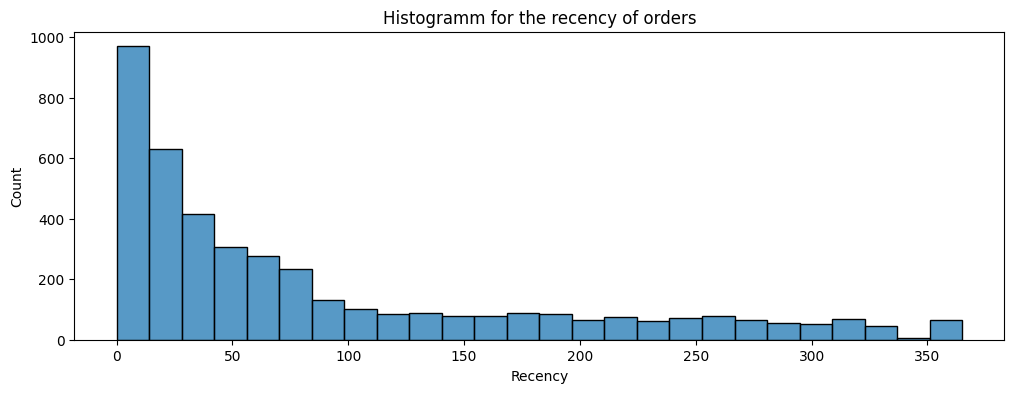

In [94]:
fig=plt.figure(figsize=(12,4))
sns.histplot(data = RFMmetrics, x = "Recency")
plt.title("Histogramm for the recency of orders")
plt.show()

### FREQUENCY

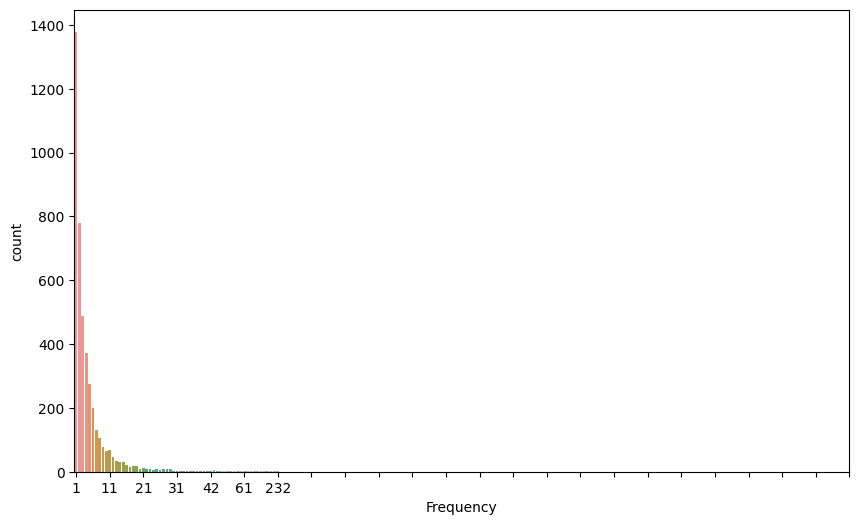

In [95]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

sns.countplot(data=RFMmetrics,x='Frequency')
ax.set_xticks(range(0,232,10))
plt.show()

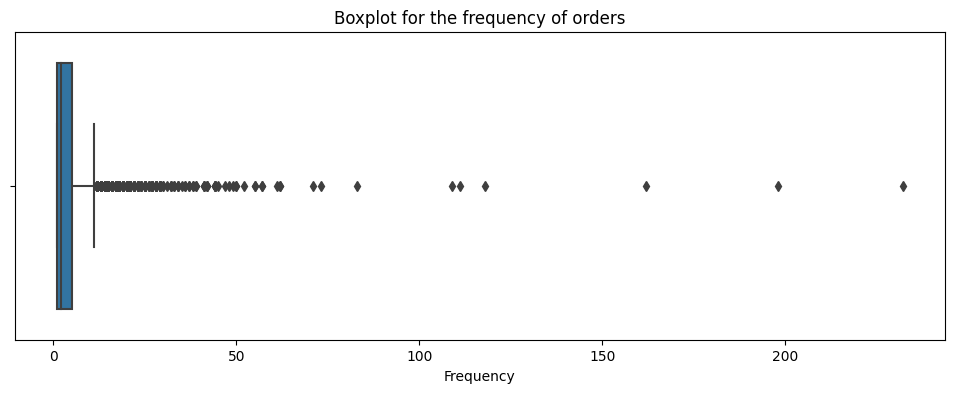

In [96]:
fig=plt.figure(figsize=(12,4))
g1=sns.boxplot(data = RFMmetrics, x = "Frequency")
plt.title("Boxplot for the frequency of orders")
plt.show()

# Computing Quantile of RFM values

In order to compute the RFM quantiles, the qcut function is used to divide the data into quantiles. The qcut function takes three arguments: the data to be divided, the number of quantiles to create, and a list of labels for the quantiles. The purpose of the particular function is to bin data into discrete intervals based on sample quantiles.

The number of quantiles to create is determined by the q parameter. The value of q depends on the size of the dataset and the level of granularity wanted in the analysis. A common value for q is 4, which creates four quantiles with equal numbers of observations. However, we can experiment with different values of q to see how it affects the results of analysis.

## Recency, Frequency and Monetary quantiles


### Recency quantiles

In [97]:
RFMmetrics.Recency.describe()

count    4284.000000
mean       87.769374
std        95.830384
min         0.000000
25%        16.000000
50%        49.000000
75%       134.000000
max       365.000000
Name: Recency, dtype: float64

The common number of 4 quantiles (q=4) has been selected for the q cut function, as it fits with the range of values with the above characteristics (min,q1,q2,q3,max)

In [98]:
r_labels = range(4, 0,-1)
r_quartiles = pd.qcut(RFMmetrics['Recency'], 4, labels = r_labels)
RFMfinal = RFMmetrics.assign(R = r_quartiles.values)
RFMfinal


,Recency,Frequency,MonetaryValue,R
customer_id,,,,
u12347,2,6,3598.21,4
u12348,75,4,1437.24,2
u12349,18,1,1457.55,3
u1235,310,1,294.40,1
u12352,36,8,1265.41,3
...,...,...,...,...
u1828,277,1,180.60,1
u18281,180,1,80.82,1
u18282,7,3,176.60,4


### Frequency quantiles

In [99]:
RFMmetrics.Frequency.describe()

count    4284.000000
mean        4.764006
std         8.629132
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       232.000000
Name: Frequency, dtype: float64

The above data description showes that, the min and 25% (q1 quartile) have the same value (not discrete). 
Thus, the common value q=4 cannot be used, as the qcut function cannot bin data into discrete intervals. 

Particularly, considering the range and density of values:
75% of the "Frequency" variable has at most the value of 5, the rest of values appears huge range (5,232] with very small probability. For this reason, the range of values, which can be selected for the q parameter varies from 2 to 3.
Thus, finally the value of q parameter proposed to be equal to the largest possible value q=3. 

In [100]:
f_labels = range(1,4)
f_quartiles = pd.qcut(RFMfinal['Frequency'], 3, labels = f_labels)
RFMfinal = RFMfinal.assign(F = f_quartiles.values)
RFMfinal

,Recency,Frequency,MonetaryValue,R,F
customer_id,,,,,
u12347,2,6,3598.21,4,3
u12348,75,4,1437.24,2,2
u12349,18,1,1457.55,3,1
u1235,310,1,294.40,1,1
u12352,36,8,1265.41,3,3
...,...,...,...,...,...
u1828,277,1,180.60,1,1
u18281,180,1,80.82,1,1
u18282,7,3,176.60,4,2


### Monetary value quantile

In [101]:
RFMmetrics.MonetaryValue.describe()

count      4284.000000
mean       1867.528898
std        8063.293047
min        -811.860000
25%         292.642500
50%         640.795000
75%        1564.637500
max      278778.020000
Name: MonetaryValue, dtype: float64

As it was previously referred, the variable "monetary value" presents the normal distribution. However, there are many extreme large monetary values with the low probability. For this reason, 7 quantiles will be used to reward the large monetary values with higher score.

In [102]:
m_labels = range(1,8)
m_quartiles = pd.qcut(RFMmetrics['MonetaryValue'], 7, labels = m_labels)
RFMfinal = RFMfinal.assign(M = m_quartiles.values)
RFMfinal

,Recency,Frequency,MonetaryValue,R,F,M
customer_id,,,,,,
u12347,2,6,3598.21,4,3,7
u12348,75,4,1437.24,2,2,6
u12349,18,1,1457.55,3,1,6
u1235,310,1,294.40,1,1,2
u12352,36,8,1265.41,3,3,5
...,...,...,...,...,...,...
u1828,277,1,180.60,1,1,2
u18281,180,1,80.82,1,1,1
u18282,7,3,176.60,4,2,1


## Building RFM segments and computing RFM score

In [103]:
def join_rfm(x): return str(round(x['R'])) + str(round(x['F'])) + str(round(x['M']))

RFMfinal['RFM_Segment'] = RFMfinal.apply(join_rfm, axis=1)
RFMfinal['RFM_Score'] = RFMfinal[['R','F','M']].sum(axis=1)

In [104]:
RFMfinal

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
u12347,2,6,3598.21,4,3,7,437,14
u12348,75,4,1437.24,2,2,6,226,10
u12349,18,1,1457.55,3,1,6,316,10
u1235,310,1,294.40,1,1,2,112,4
u12352,36,8,1265.41,3,3,5,335,11
...,...,...,...,...,...,...,...,...
u1828,277,1,180.60,1,1,2,112,4
u18281,180,1,80.82,1,1,1,111,3
u18282,7,3,176.60,4,2,1,421,7


## The segment with the highest score

In [105]:
highScoreSegment=RFMfinal[RFMfinal['RFM_Score']==14]
highScoreSegment

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
u12347,2,6,3598.21,4,3,7,437,14
u12359,7,6,6182.98,4,3,7,437,14
u12362,3,12,4665.58,4,3,7,437,14
u12388,15,6,2780.66,4,3,7,437,14
u12417,3,11,3155.80,4,3,7,437,14
...,...,...,...,...,...,...,...,...
u18223,1,26,6318.07,4,3,7,437,14
u18225,3,16,5388.66,4,3,7,437,14
u18229,11,18,6623.70,4,3,7,437,14


In [106]:
highScoreSegment.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,350.000000,350.000000,350.000000,350.0
mean,5.740000,20.594286,10943.871571,14.0
std,4.578303,22.527181,24985.691787,0.0
min,0.000000,5.000000,2599.030000,14.0
25%,2.000000,10.000000,3401.962500,14.0
50%,4.000000,15.000000,4890.690000,14.0
75%,9.000000,24.000000,8555.885000,14.0
max,16.000000,232.000000,278778.020000,14.0


In [107]:
RFM_segm_distr=RFMfinal.groupby(['RFM_Segment']).size().sort_values(ascending=False).to_frame("RFM_segment_frequency").reset_index()


In [108]:
RFM_segm_distr

,RFM_Segment,RFM_segment_frequency
0,437,350
1,111,321
2,112,239
3,436,183
4,113,169
...,...,...
75,131,3
76,432,3
77,417,3
78,317,2


## The segment with the lowest score

In [109]:
lowScoreSegment=RFMfinal[RFMfinal['RFM_Segment']=='111']
lowScoreSegment

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
u12353,204,1,89.00,1,1,1,111,3
u12361,287,1,174.90,1,1,1,111,3
u12386,337,1,143.00,1,1,1,111,3
u12401,303,1,69.30,1,1,1,111,3
u12506,232,1,73.50,1,1,1,111,3
...,...,...,...,...,...,...,...,...
u18224,263,1,158.95,1,1,1,111,3
u18227,217,1,93.75,1,1,1,111,3
u18256,354,1,-50.10,1,1,1,111,3


In [110]:
lowScoreSegment.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,321.000000,321.000000,321.000000,321.0
mean,251.685358,1.118380,107.396106,3.0
std,64.693344,0.323562,77.546443,0.0
min,135.000000,1.000000,-811.860000,3.0
25%,197.000000,1.000000,85.000000,3.0
50%,253.000000,1.000000,121.000000,3.0
75%,304.000000,1.000000,152.400000,3.0
max,365.000000,2.000000,179.170000,3.0


## Overview RFM metrics per RFM score

In [111]:
RFMfinal.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count'] }).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           252.0       1.0         107.0   321
4           188.0       1.0         203.0   367
5           137.0       1.0         274.0   447
6            98.0       2.0         367.0   428
7            87.0       2.0         538.0   399
8            71.0       2.0         721.0   373
9            57.0       3.0         920.0   310
10           45.0       4.0        1393.0   318
11           43.0       5.0        1628.0   304
12           28.0       7.0        2170.0   337
13           15.0      10.0        4070.0   330
14            6.0      21.0       10944.0   350

In [112]:
RFMmetrics.describe()

,Recency,Frequency,MonetaryValue
count,4284.000000,4284.000000,4284.000000
mean,87.769374,4.764006,1867.528898
std,95.830384,8.629132,8063.293047
min,0.000000,1.000000,-811.860000
25%,16.000000,1.000000,292.642500
50%,49.000000,2.000000,640.795000
75%,134.000000,5.000000,1564.637500
max,365.000000,232.000000,278778.020000


# Customer Segmentation based on RFM score

In [113]:
RFM_score_distr=RFMfinal.groupby(['RFM_Score']).size().sort_values(ascending=False).to_frame("RFM_score_frequency").reset_index()
RFM_score_distr

,RFM_Score,RFM_score_frequency
0,5,447
1,6,428
2,7,399
3,8,373
4,4,367
5,14,350
6,12,337
7,13,330
8,3,321
9,10,318


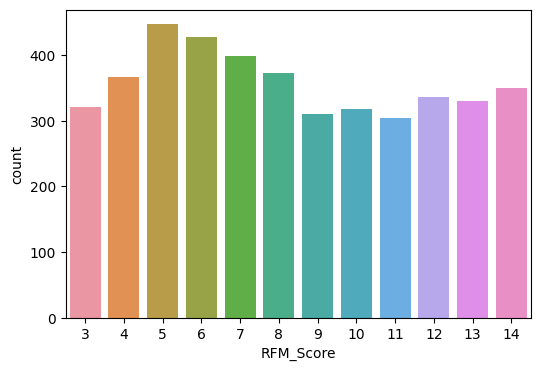

In [114]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

sns.countplot(data=RFMfinal,x='RFM_Score')
#ax.set_xticks(range(0,330,26))
plt.show()

In [115]:
RFMfinal.RFM_Score.describe()

count    4284.000000
mean        8.300420
std         3.423708
min         3.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: RFM_Score, dtype: float64

In [116]:
def group_into_segments(df):
    if df["RFM_Score"]==14:#14
        return "Top"
    elif df["RFM_Score"]>=11 and df["RFM_Score"]<14: #10,11,12,13
        return "High"
    elif df["RFM_Score"]>=6 and df["RFM_Score"]<11: #6,7,8,9,10
        return "Medium"
    elif df["RFM_Score"]>=4 and df["RFM_Score"]<6: #4,5
        return "At risk"
    else:
        return "Lost"


In [117]:
RFMfinal["customer_segment"]=RFMfinal.apply(group_into_segments,axis=1)
RFMfinal

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,customer_segment
customer_id,,,,,,,,,
u12347,2,6,3598.21,4,3,7,437,14,Top
u12348,75,4,1437.24,2,2,6,226,10,Medium
u12349,18,1,1457.55,3,1,6,316,10,Medium
u1235,310,1,294.40,1,1,2,112,4,At risk
u12352,36,8,1265.41,3,3,5,335,11,High
...,...,...,...,...,...,...,...,...,...
u1828,277,1,180.60,1,1,2,112,4,At risk
u18281,180,1,80.82,1,1,1,111,3,Lost
u18282,7,3,176.60,4,2,1,421,7,Medium


In [118]:
RFMfinalNew=RFMfinal.reset_index()
RFMfinalNew

,customer_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,customer_segment
0,u12347,2,6,3598.21,4,3,7,437,14,Top
1,u12348,75,4,1437.24,2,2,6,226,10,Medium
2,u12349,18,1,1457.55,3,1,6,316,10,Medium
3,u1235,310,1,294.40,1,1,2,112,4,At risk
4,u12352,36,8,1265.41,3,3,5,335,11,High
...,...,...,...,...,...,...,...,...,...,...
4279,u1828,277,1,180.60,1,1,2,112,4,At risk
4280,u18281,180,1,80.82,1,1,1,111,3,Lost
4281,u18282,7,3,176.60,4,2,1,421,7,Medium
4282,u18283,3,16,2039.58,4,3,6,436,13,High


In [119]:
summaryTable=RFMfinalNew.groupby(["customer_segment"]).\
agg({"customer_id":["count"],"Recency":["mean"],"Frequency":["mean"],"MonetaryValue":["mean"]}).round()


In [120]:
summaryTable.iloc[:,-1]=summaryTable.iloc[:,-1].astype(str).apply(lambda x: x.replace(".0",""))
summaryTable.iloc[:,-2]=summaryTable.iloc[:,-2].astype(str).apply(lambda x: x.replace(".0",""))
summaryTable.iloc[:,-3]=summaryTable.iloc[:,-3].astype(str).apply(lambda x: x.replace(".0",""))

In [121]:
summaryTable.sort_values("customer_segment",ascending=False,inplace=True)
summaryTable

,customer_id,Recency,Frequency,MonetaryValue
,count,mean,mean,mean
customer_segment,,,,
Top,350,6,21,10944
Medium,1828,74,3,749
Lost,321,252,1,107
High,971,28,7,2646
At risk,814,160,1,242


## Visualization of customer segmentation results

In [122]:
summaryTable.index

Index(['Top', 'Medium', 'Lost', 'High', 'At risk'], dtype='object', name='customer_segment')

In [123]:
summaryTable[('customer_id', 'count')].values

array([ 350, 1828,  321,  971,  814], dtype=int64)

In [124]:
summaryTablePlotNew=pd.DataFrame({'CUSTOMER_SEGMENT':summaryTable.index,'COUNT':summaryTable[('customer_id', 'count')].values})


In [125]:
summaryTablePlotNew

,CUSTOMER_SEGMENT,COUNT
0,Top,350
1,Medium,1828
2,Lost,321
3,High,971
4,At risk,814


In [126]:
summaryTablePlotNew.sort_values(by='COUNT',ascending=False, inplace=True)

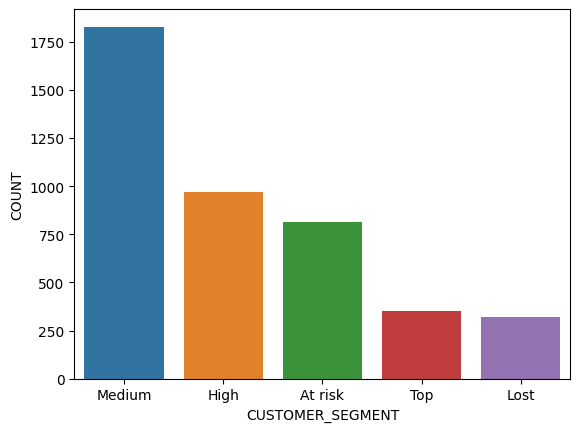

In [127]:
sns.barplot(data=summaryTable,x=summaryTablePlotNew.CUSTOMER_SEGMENT,y=summaryTablePlotNew.COUNT)
plt.show()

In [128]:
summaryTablePlotNew

,CUSTOMER_SEGMENT,COUNT
1,Medium,1828
3,High,971
4,At risk,814
0,Top,350
2,Lost,321


In [129]:
summaryTablePie=summaryTablePlotNew.rename(columns={"CUSTOMER_SEGMENT":"(%) customer segmentation"})
summaryTablePie=summaryTablePie.set_index("(%) customer segmentation")
summaryTablePie

,COUNT
(%) customer segmentation,
Medium,1828
High,971
At risk,814
Top,350
Lost,321


<Axes: ylabel='COUNT'>

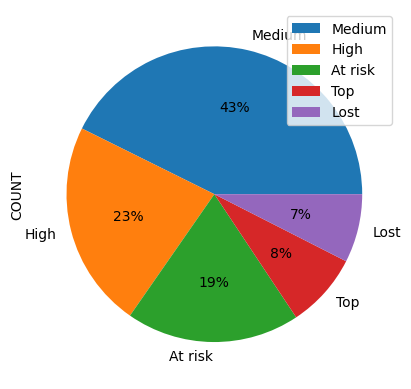

In [130]:
summaryTablePie.plot(kind='pie', y="COUNT",autopct='%1.0f%%')